In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive    
 
drive.mount('/content/drive')

Mounted at /content/drive


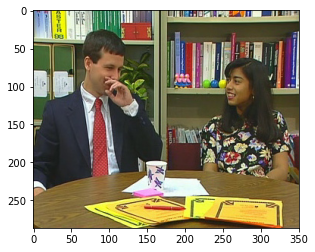

In [3]:
img=cv2.imread('/content/drive/MyDrive/lib.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
def normm(img1,img2):
    if (img1.std()==0 or img2.std()==0):
        return 0
    up=np.mean((img1-img1.mean())*(img2-img2.mean()))
    down=(img1.std()*img2.std())
    return up/down
def corr_match(img1,img2,xx):
    mp1=[]
    mp2=[]
    d={}
    l=0
    x,y=xx[0],xx[1]
    #img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]))
    for i in range((img1.shape[0]-x)):
        for j in range((img1.shape[1]-y)):
            img=img1[i:i+x,j:j+y].copy()
            corr=0
            mp1.append((i,j))
            mp2.append((0,0))
            for ii in range((img2.shape[0]-x)):
                for jj in range((img2.shape[1]-y)):
                    temp=img2[ii:ii+x,jj:jj+y].copy()
                    corr_temp=normm(img,temp)
                    if(corr_temp>corr):
                        mp2[l]=(ii,jj)
                        corr=corr_temp
            d[i,j]=mp2[l]
            l=l+1
    return d
def corr_match1(img1,img2,xx):
    mp1=[]
    mp2=[]
    d={}
    l=0
    x,y=xx[0],xx[1]
    #img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]))
    for i in range((img1.shape[0]-x)):
        for j in range((img1.shape[1]-y)):
            img=img1[i:i+x,j:j+y].copy()
            corr=0
            mp1.append((i,j))
            mp2.append((0,0))
            for ii in range((img2.shape[0]-x)):
                for jj in range((img2.shape[1]-y)):
                    temp=img2[ii:ii+x,jj:jj+y].copy()
                    corr_temp=normm(img,temp)
                    if(corr_temp>corr):
                        mp2[l]=(ii,jj)
                        corr=corr_temp
            d[i,j]=mp2[l]
            l=l+1
    return d
def corr_match2(img1,img2,xx):
    mp1=[]
    mp2=[]
    d={}
    l=0
    x,y=xx[0],xx[1]
    #img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]))
    for i in range((img1.shape[0]-x)):
        for j in range((img1.shape[1]-y)):
            img=img1[i:i+x,j:j+y].copy()
            corr=0
            mp1.append((i,j))
            mp2.append((0,0))
            for ii in range((img2.shape[0]-x)):
                for jj in range((img2.shape[1]-y)):
                    temp=img2[ii:ii+x,jj:jj+y].copy()
                    corr_temp=normm(img,temp)
                    if(corr_temp>corr):
                        mp2[l]=(ii,jj)
                        corr=corr_temp
            d[mp2[l]]=(i,j)
            l=l+1
    return d

In [4]:
from numpy.linalg import norm
def PP(a,l=5,s=5):
    x = np.arange(0,a.shape[1]-s+1,1)
    y = np.arange(0,a.shape[0]-s+1,1)
    x,y = np.meshgrid(x,y)
    return x.flatten(),y.flatten()
def patches(a,x,y,l=5):
    g = len(x) ; lis = np.asarray([])
    for i in range(g):
        if i==0:
            lis=a[y[i]:y[i]+l,x[i]:x[i]+l].flatten()
        if i!=0:
            lis=np.vstack((lis,a[y[i]:y[i]+l,x[i]:x[i]+l].flatten()))
    return lis
def NCC_best_patch1(a,b,l=5,s=5):
    
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l)    
    d={}
    lis1 = lis1-np.mean(lis1,axis=1).reshape(-1,1) ; lis1 = lis1/(norm(lis1,axis=1).reshape(-1,1)+0.1)
    #lis2 = lis2-np.mean(lis2,axis=1).reshape(-1,1) ; lis2 = lis2/(norm(lis2,axis=1).reshape(-1,1)+0.1)
    ans=np.argmax(lis1@lis2.T,axis=1)
    #ans=np.append(ans,np.argmax(lis1[len(lis1)//2:]@lis2.T,axis=1),axis=0)
    #ans = np.argmax(arr,axis=1)
    for i in range(len(x1)):
        d[(y1[i],x1[i])]=(y2[ans[i]],x2[ans[i]])
    return d
def NCC_best_patch2(a,b,l=5,s=5):
    
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l)    
    d={}
    lis1 = lis1-np.mean(lis1,axis=1).reshape(-1,1) ; lis1 = lis1/(norm(lis1,axis=1).reshape(-1,1)+0.1)
    #lis2 = lis2-np.mean(lis2,axis=1).reshape(-1,1) ; lis2 = lis2/(norm(lis2,axis=1).reshape(-1,1)+0.1)
    ans=np.argmax(lis1@lis2.T,axis=1)
    #ans=np.append(ans,np.argmax(lis1[len(lis1)//2:]@lis2.T,axis=1),axis=0)
    #ans = np.argmax(arr,axis=1)
    for i in range(len(x1)):
        d[(y2[ans[i]],x2[ans[i]])]=(y1[i],x1[i])
    return d

In [13]:
def NCC_best_patch11(a,b,l=5,s=5):
    a=cv2.cvtColor(a,cv2.COLOR_RGB2Lab)
    b=cv2.cvtColor(b,cv2.COLOR_RGB2Lab)
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l)
    #lis1 = lis1-np.mean(lis1,axis=1).reshape(-1,1)
    #lis2 = lis2-np.mean(lis2,axis=1).reshape(-1,1) 
    #print(lis1.shape,lis2.shape)   
    d={}
    ans=[]
    ans1=[]
    for i in lis1:
        if(len(ans)%1000==0):
          print('*',end="")
        here=np.sum((lis2-i)**2,axis=1)
        ans.append(np.argmin(here))
        ans1.append(np.min(here))
    for i in range(len(x1)):
        d[(y1[i],x1[i])]=(y2[ans[i]],x2[ans[i]])
    ans1=np.array(ans1)
    #print(ans1)
    return d,np.sum(ans1)/len(ans)
def NCC_best_patch21(a,b,l=5,s=5):
    a=cv2.cvtColor(a,cv2.COLOR_RGB2Lab)
    b=cv2.cvtColor(b,cv2.COLOR_RGB2Lab)
    x1,y1 = PP(a,l,s) ; lis1 = patches(a,x1,y1,l)
    x2,y2 = PP(b,l,s) ; lis2 = patches(b,x2,y2,l)    
    #lis1 = lis1-np.mean(lis1,axis=1).reshape(-1,1)
    #lis2 = lis2-np.mean(lis2,axis=1).reshape(-1,1)
    d={}
    ans=[]
    ans1=[]    
    for i in lis1:
        if(len(ans)%1000==0):
          print('*',end="")
        here=np.sum((lis2-i)**2,axis=1)
        ans.append(np.argmin(here))
        ans1.append(np.min(here))
    for i in range(len(x1)):
        d[(y2[ans[i]],x2[ans[i]])]=(y1[i],x1[i])
    ans1=np.array(ans1)
    #print(ans1)
    return d,np.sum(ans1)/len(ans)

***************4008.8048866605463
************************************************************4121.217129131954


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


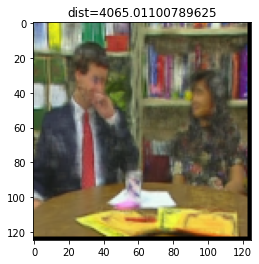

****4770.567559249
***************5121.243485629546


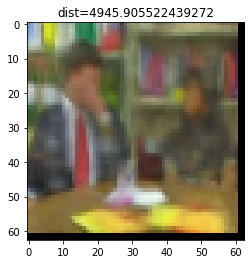

*5685.492603550296
****6410.056632810096


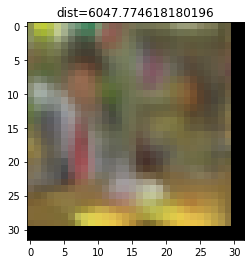

*6073.33
*7353.137573964497


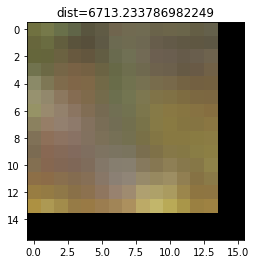

In [20]:
S=cv2.imread('/content/drive/MyDrive/lib.png')
S=cv2.resize(S,(250,250))
S=cv2.cvtColor(S,cv2.COLOR_BGR2RGB)
T=S.copy()
T_array=[]
dist=0
T_array.append((T,0))
#window size=7*7 always
for _ in range(4):
    T=cv2.pyrDown(S)
    out=T.copy()
    match1,me1=NCC_best_patch11(T,S,7,7)
    print(me1)
    match2,me2=NCC_best_patch21(S,T,7,7)
    print(me2)
    dist=(me1+me2)/2
    for i in range(T.shape[0]):
        for j in range(T.shape[1]):
            cnt1=0
            sum1=np.array([0,0,0])
            cnt2=0
            sum2=np.array([0,0,0])
            for x in range(5): 
                for y in range(5):
                    try :
                        here=match1[(i-x,j-y)]
                        sum1=sum1+S[here[0]+x,here[1]+y]
                        cnt1=cnt1+1
                    except :
                        continue
            for x in range(5):
                for y in range(5):
                    try :
                        here=match2[(i-x,j-y)]
                        sum2=sum2+S[here[0]+x,here[1]+y]
                        cnt2=cnt2+1
                    except :
                        continue
            out[i,j]=np.array((sum1+sum2)/(cnt1+cnt2),int)
    T=out.copy()
    plt.title('dist='+str(dist))
    plt.imshow(T)
    T_array.append((T,dist))
    plt.show()
    S=T.copy()

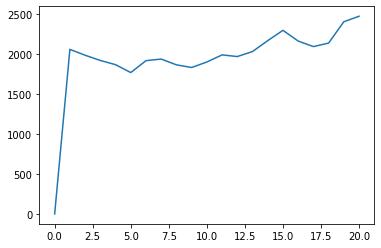

In [15]:
dist=[]
for i in T_array:
  dist.append(i[1])
plt.plot(dist)

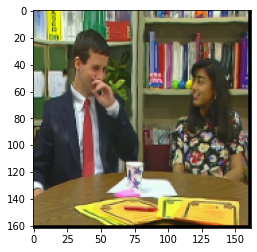

In [16]:
plt.imshow(T_array[4][0])